## Includes

In [9]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Define global options

In [10]:
datadir = "data"

In [11]:
locations = {
    'waldau': {
        'title': "Waldau",
        'areas': {
            'innen': "Innenbereich",
            'aussen': "Außenbereich",
            'boulder': "Boulderbereich"
        },
        'show_percent': True,
        'show_free': True,
        'show_legend': True
    },
    'roccadion': {
        'title': "Roccadion",
        'areas': {
            'gesamt': ""
        },
        'show_percent': True,
        'show_free': False,
        'show_legend': False
    },
    'reutlingen': {
        'title': "Reutlingen",
        'areas': {
            'gesamt': ""
        },
        'show_percent': True,
        'show_free': False,
        'show_legend': False
    }
}

## Read the data

In [12]:
data = {}
for location in locations:
    
    filename = "climbload_" + location + ".csv"
    filepath = os.path.join(datadir, filename)
    
    # Read data
    data[location] = pd.read_csv(filepath)
    
    #print(data[location].columns)
    
    # Convert datetime fields
    data[location]['date_start'] =  pd.to_datetime(data[location]['date_start'], format='%Y-%m-%d %H:%M:%S')
    data[location][' date_end'] =  pd.to_datetime(data[location][' date_end'], format='%Y-%m-%d %H:%M:%S')
    
    


## Visualizations

### Daily graph

In [13]:
now = datetime.datetime.now()
year = int(now.strftime("%Y"))
month = int(now.strftime("%m"))
day = int(now.strftime("%d"))
#print("%s-%s-%s" % (year, month, day))

2020-8-25


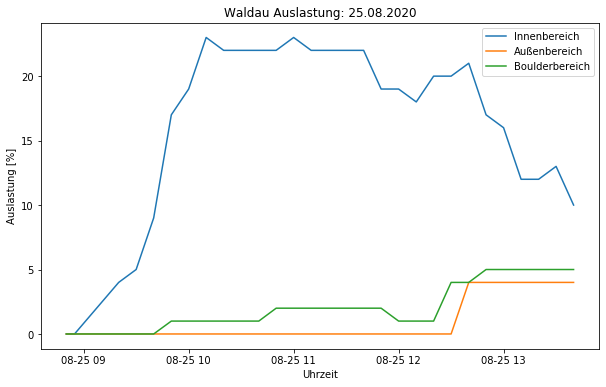

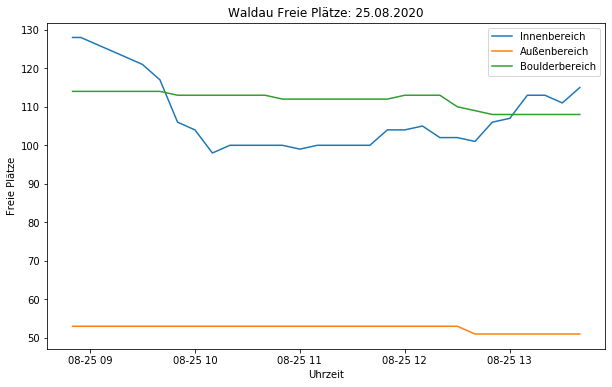

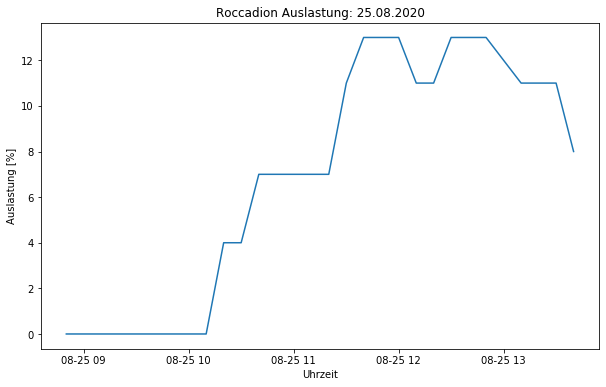

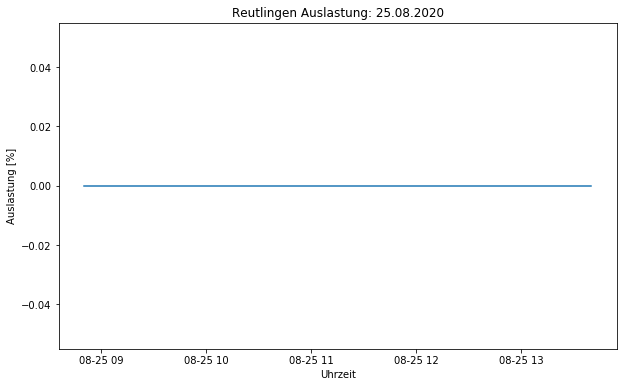

In [14]:
showtime_start = datetime.datetime(year, month, day, 0, 0, 0)
showtime_stop = datetime.datetime(year, month, day, 23, 59, 59)

for location in locations:
    
    datasubset = data[location][(data[location]['date_start'] >= showtime_start) & (data[location]['date_start'] <= showtime_stop)]
    
    if locations[location]['show_percent']:
        
        fig, ax = plt.subplots(figsize=(10, 6))

        for area in locations[location]['areas']:

            ykey = " " + area + "_percent"

            ax.plot(datasubset['date_start'], datasubset[ykey], label=locations[location]['areas'][area])

        ax.set_title("%s Auslastung: %s" % (locations[location]['title'], showtime_start.strftime("%d.%m.%Y")))
        ax.set_xlabel('Uhrzeit')
        ax.set_ylabel('Auslastung [%]')
        
        if locations[location]['show_legend']:
            ax.legend()
    
    
    if locations[location]['show_free']:
        
        fig, ax = plt.subplots(figsize=(10, 6))

        for area in locations[location]['areas']:

            ykey = " " + area + "_free"

            ax.plot(datasubset['date_start'], datasubset[ykey], label=locations[location]['areas'][area])

        ax.set_title("%s Freie Plätze: %s" % (locations[location]['title'], showtime_start.strftime("%d.%m.%Y")))
        ax.set_xlabel('Uhrzeit')
        ax.set_ylabel('Freie Plätze')
        
        if locations[location]['show_legend']:
            ax.legend()


### Weekly graph